In [23]:
!pip install geopandas matplotlib contextily cartopy shap ipywidgets


In [24]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [20]:
pos_data = pd.read_csv('./a.danger_forecasting/positives.csv')
neg_data = pd.read_csv('./a.danger_forecasting/negatives.csv')

In [5]:
max_wspeed = pos_data['wind_speed'].max()
min_wspeed = pos_data['wind_speed'].min()
print(max_wspeed, "minimum:", min_wspeed)

15.19773 minimum: 0.5327648


In [3]:
neg_data[neg_data['time_idx'] == 0]

,time,aspect,burned_areas,curvature,d2m,dem,ignition_points,lai,lst_day,lst_night,...,lc_grassland,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,population,burned_area_has,time_idx,sample
0,2006-04-02,6.933952,0.0,-27.86932,285.72403,10.045106,0.0,NaN,300.38000,287.24000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,510.946840,0.0,0,0
30,2006-04-03,324.242250,0.0,3856.14620,280.59085,536.597660,0.0,NaN,305.97998,276.38000,...,0.000000,0.0,0.000000,0.111906,0.0,0.0,24.802261,0.0,0,1
60,2006-04-04,193.683650,0.0,-3433.69140,279.91855,862.342350,0.0,NaN,299.66000,281.56000,...,0.002632,0.0,0.112851,0.000000,0.0,0.0,3.094851,0.0,0,2
90,2006-04-04,148.975140,0.0,159.16138,280.12573,829.458200,0.0,NaN,294.88000,NaN,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,8.355893,0.0,0,3
120,2006-04-05,209.525920,0.0,-6856.34470,282.17834,443.646940,0.0,NaN,290.18000,282.32000,...,0.454698,0.0,0.000000,0.000000,0.0,0.0,6.200409,0.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520110,2022-08-31,345.374970,0.0,-236.41968,292.22995,427.748050,0.0,0.7,309.82000,NaN,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,18.669367,0.0,0,17337
520140,2022-08-31,171.650820,0.0,-7929.40670,288.94803,772.414300,0.0,0.4,316.19998,293.19998,...,0.000000,0.0,0.629520,0.000000,0.0,0.0,1.654932,0.0,0,17338
520170,2022-08-31,334.142700,0.0,1379.09240,290.39203,355.851870,0.0,0.2,318.40000,NaN,...,0.000000,0.0,0.000000,0.436023,0.0,0.0,11.887775,0.0,0,17339
520200,2022-08-31,187.799910,0.0,-389.67285,291.19238,928.568540,0.0,4.0,307.25998,290.36000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,4.218067,0.0,0,17340


In [6]:
neg_data.columns

Index(['time', 'aspect', 'burned_areas', 'curvature', 'd2m', 'dem',
       'ignition_points', 'lai', 'lst_day', 'lst_night', 'ndvi', 'rh',
       'roads_distance', 'slope', 'smi', 'sp', 'ssrd', 't2m', 'tp',
       'wind_direction', 'wind_speed', 'x', 'y', 'lc_agriculture', 'lc_forest',
       'lc_grassland', 'lc_settlement', 'lc_shrubland', 'lc_sparse_vegetation',
       'lc_water_bodies', 'lc_wetland', 'population', 'burned_area_has',
       'time_idx', 'sample'],
      dtype='object')

In [5]:
pos_data

,time,aspect,burned_areas,curvature,d2m,dem,ignition_points,lai,lst_day,lst_night,...,lc_grassland,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,population,burned_area_has,time_idx,sample
0,2006-07-29,182.77820,0.0,-1469.686900,289.78036,142.89676,0.0,0.5,321.16000,295.52000,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.20321,40.0,0,0
1,2006-07-30,182.77820,0.0,-1469.686900,290.09662,142.89676,0.0,0.5,317.60000,293.63998,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.20321,40.0,1,0
2,2006-07-31,182.77820,0.0,-1469.686900,290.19055,142.89676,0.0,0.5,316.90000,293.00000,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.20321,40.0,2,0
3,2006-08-01,182.77820,0.0,-1469.686900,290.22266,142.89676,0.0,0.5,316.80000,294.66000,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.20321,40.0,3,0
4,2006-08-02,182.77820,0.0,-1469.686900,290.36680,142.89676,0.0,0.5,315.41998,295.91998,...,0.0,0.00000,0.0,0.000000,0.0,0.0,0.20321,40.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257215,2015-07-19,351.22073,0.0,-21.881104,287.77030,505.24857,0.0,0.2,316.25998,298.19998,...,0.0,0.22604,0.0,0.576602,0.0,0.0,5349.81450,138.0,25,8573
257216,2015-07-20,351.22073,0.0,-21.881104,285.27957,505.24857,0.0,0.2,323.88000,NaN,...,0.0,0.22604,0.0,0.576602,0.0,0.0,5349.81450,138.0,26,8573
257217,2015-07-21,351.22073,0.0,-21.881104,283.50925,505.24857,0.0,0.2,320.12000,NaN,...,0.0,0.22604,0.0,0.576602,0.0,0.0,5349.81450,138.0,27,8573
257218,2015-07-22,351.22073,0.0,-21.881104,286.04520,505.24857,0.0,0.2,324.34000,298.41998,...,0.0,0.22604,0.0,0.576602,0.0,0.0,5349.81450,138.0,28,8573


In [4]:
pos_data[pos_data['time_idx'] == 0]

,time,aspect,burned_areas,curvature,d2m,dem,ignition_points,lai,lst_day,lst_night,...,lc_grassland,lc_settlement,lc_shrubland,lc_sparse_vegetation,lc_water_bodies,lc_wetland,population,burned_area_has,time_idx,sample
0,2006-07-29,182.778200,0.0,-1469.686900,289.78036,142.89676,0.0,0.5,321.16000,295.52,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.203210,40.0,0,0
30,2006-08-01,251.970410,0.0,7917.309600,287.56638,725.28230,0.0,0.8,310.75998,292.72,...,0.000000,0.00000,0.467872,0.000000,0.023528,0.0,5.054824,98.0,0,1
60,2006-05-15,250.553280,0.0,1964.971900,286.77570,610.15280,0.0,1.4,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,2.285598,256.0,0,2
90,2006-07-22,298.947780,0.0,70075.250000,283.35565,1186.66810,0.0,0.4,315.60000,299.18,...,0.000000,0.00000,0.709402,0.143565,0.000000,0.0,34.967278,644.0,0,3
120,2006-07-09,2.503906,0.0,2555.639600,289.07460,611.20245,0.0,0.5,316.10000,296.44,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,106.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257070,2014-02-21,164.327650,0.0,-16048.169000,279.17194,514.64764,0.0,0.3,NaN,278.08,...,0.022091,0.00000,0.122798,0.109686,0.000000,0.0,4.264875,58.0,0,8569
257100,2014-02-23,62.683590,0.0,-32704.113000,280.37936,805.21783,0.0,0.3,289.63998,275.66,...,0.000000,0.00000,1.000000,0.000000,0.000000,0.0,6.417916,4127.0,0,8570
257130,2010-06-13,171.238590,0.0,-2828.906200,282.30676,1502.72190,0.0,1.0,NaN,284.22,...,0.000000,0.00000,0.481616,0.000000,0.000000,0.0,13.944526,118.0,0,8571
257160,2014-07-04,46.000572,0.0,16962.354000,285.75995,1717.85070,0.0,0.5,310.10000,289.16,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,5.994393,96.0,0,8572


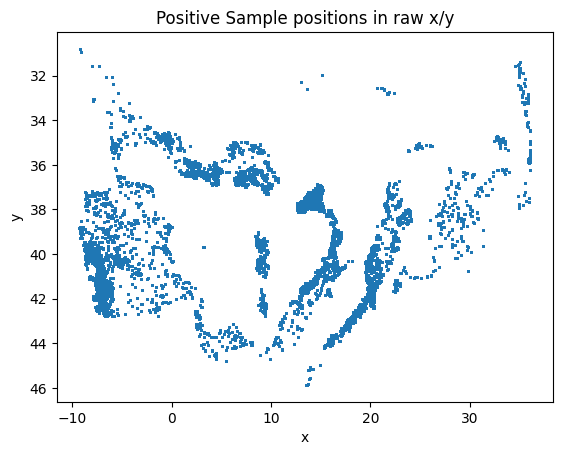

In [6]:
plt.scatter(pos_data['x'], pos_data['y'], s=1)
plt.title("Positive Sample positions in raw x/y")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().invert_yaxis()  # Wenn Bildkoordinaten (0 oben)
plt.show()

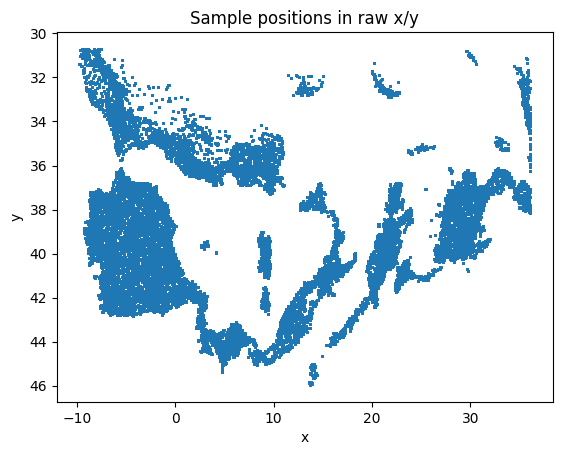

In [7]:
plt.scatter(neg_data['x'], neg_data['y'], s=1)
plt.title("Sample positions in raw x/y")
plt.xlabel("x")
plt.ylabel("y")
plt.gca().invert_yaxis()  # Wenn Bildkoordinaten (0 oben)
plt.show()

### Plot der positiven Proben mit Cartopy

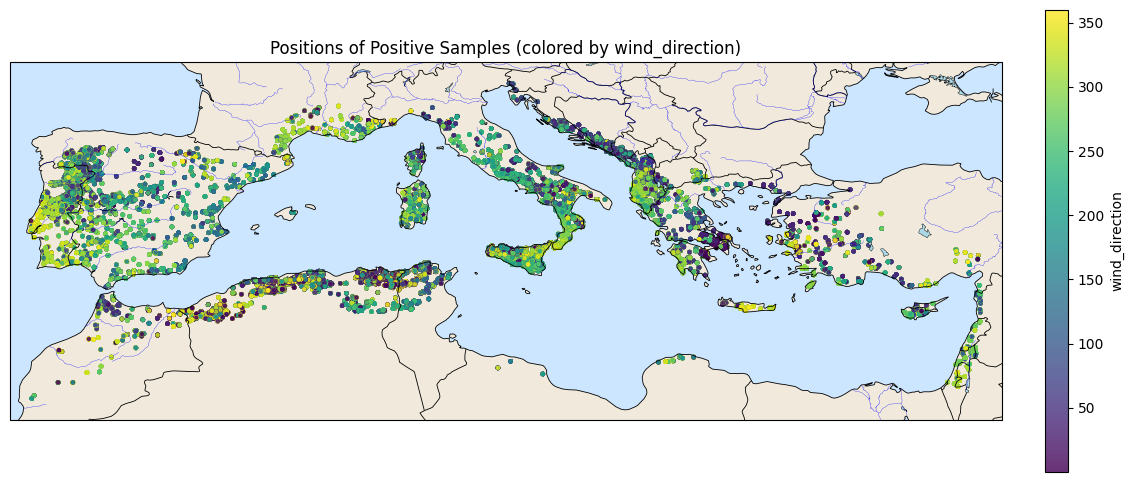

In [21]:

x = pos_data['x']
y = pos_data['y']
influence_variable = pos_data['wind_direction']

# Plot mit Cartopy
fig = plt.figure(figsize=(14, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([x.min() - 1, x.max() + 1, y.min() - 1, y.max() + 1], crs=ccrs.PlateCarree())
#ax.stock_img()

# Features hinzufügen
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#f0e9dc')  # Sandfarben
ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor='#cce6ff')  # Hellblau
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.6)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.6)
ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='lightblue', edgecolor='k', linewidth=0.3)
ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='blue', linewidth=0.2)

# Scatter mit Farbe nach Population
sc = ax.scatter(x, y, c=influence_variable, cmap='viridis', s=5, alpha=0.8, vmin=influence_variable.min(), vmax=influence_variable.max(), transform=ccrs.PlateCarree())

# Farbskala
cb = plt.colorbar(sc, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cb.set_label(f'{influence_variable.name}')

# Titel
plt.title(f"Positions of Positive Samples (colored by {influence_variable.name})")

plt.show()

In [18]:
df = pd.read_csv("/Users/I566184/Downloads/shap_map_mlp.csv")
df.rename(columns={"x": "lat", "y": "lon"}, inplace=True)

feature_names = [col for col in df.columns if col not in ["lon", "lat"]]
dropdown = widgets.Dropdown(
    options=feature_names,
    value=feature_names[0],
    description='SHAP Feature:'
)

def plot_feature_map(feature_name):
    fig = plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Set extent basierend auf Longitude (x) und Latitude (y)
    ax.set_extent([
        df["lon"].min() - 1, df["lon"].max() + 1,
        df["lat"].min() - 1, df["lat"].max() + 1
    ], crs=ccrs.PlateCarree())

    # Basemap
    ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor='#f0e9dc')
    ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor='#cce6ff')
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.6)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.6)
    ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='lightblue', edgecolor='k', linewidth=0.3)
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='blue', linewidth=0.2)

    # Scatterplot
    sc = ax.scatter(df["lon"], df["lat"], c=df[feature_name], cmap='viridis',
                    s=5, alpha=0.8, transform=ccrs.PlateCarree())

    # Colorbar
    cb = plt.colorbar(sc, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cb.set_label(f'SHAP: {feature_name}')

    plt.title(f"SHAP Values for '{feature_name}' - MLP")
    plt.show()
widgets.interact(plot_feature_map, feature_name=dropdown);

interactive(children=(Dropdown(description='SHAP Feature:', options=('d2m', 'dem', 'lai', 'lc_agriculture', 'l…

In [45]:
ignition_dates = pos_data[pos_data['time_idx'] == 0]
sum_ignition = ignition_dates['time'].count()
sum_ignition

np.int64(8574)

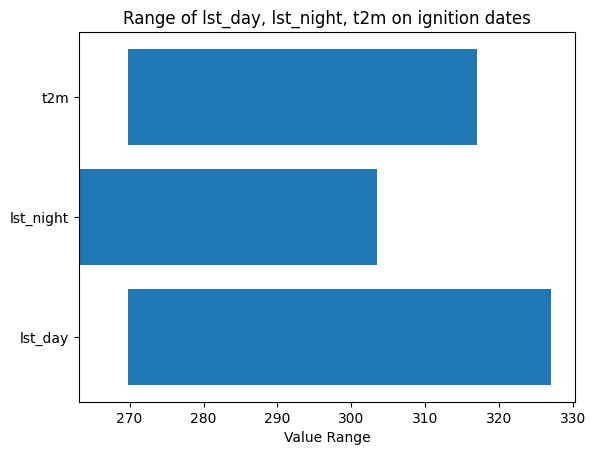

In [28]:
# Range (Min & Max) berechnen
lst_day_min, lst_day_max = ignition_dates['lst_day'].min(), ignition_dates['lst_day'].max()
lst_night_min, lst_night_max = ignition_dates['lst_night'].min(), ignition_dates['lst_night'].max()
t2m_min, t2m_max = ignition_dates['t2m'].min(), ignition_dates['t2m'].max()

# Plot vorbereiten
variables = ['lst_day', 'lst_night', 't2m']
mins = [lst_day_min, lst_night_min, t2m_min]
maxs = [lst_day_max, lst_night_max, t2m_max]
ranges = [max_val - min_val for min_val, max_val in zip(mins, maxs)]

# Balken horizontal zeichnen
plt.barh(variables, ranges, left=mins)

# Achsen beschriften
plt.xlabel('Value Range')
plt.title('Range of lst_day, lst_night, t2m on ignition dates')

plt.show()

In [46]:
nan_counts_lst_day = ignition_dates['lst_day'].isna().sum()
nan_counts_lst_night = ignition_dates['lst_night'].isna().sum()
nan_counts_t2m = ignition_dates['t2m'].isna().sum()

In [40]:
non_ignition_dates = pos_data[pos_data['time_idx'] != 0]
sum_non_ignition = non_ignition_dates['time'].count()
sum_non_ignition

np.int64(248646)

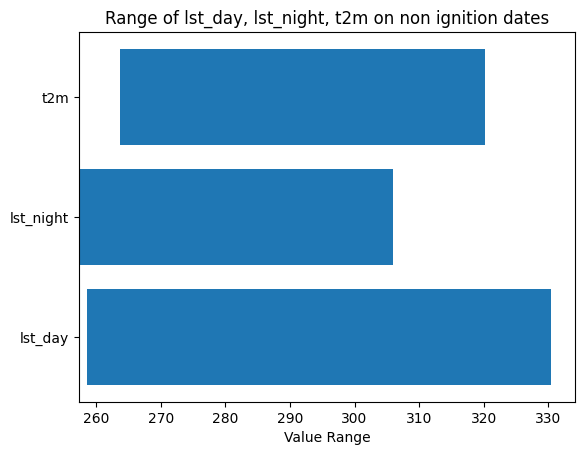

In [50]:
# Range (Min & Max) berechnen
lst_day_min, lst_day_max = non_ignition_dates['lst_day'].min(), non_ignition_dates['lst_day'].max()
lst_night_min, lst_night_max = non_ignition_dates['lst_night'].min(), non_ignition_dates['lst_night'].max()
t2m_min, t2m_max = non_ignition_dates['t2m'].min(), non_ignition_dates['t2m'].max()

# Plot vorbereiten
variables = ['lst_day', 'lst_night', 't2m']
mins = [lst_day_min, lst_night_min, t2m_min]
maxs = [lst_day_max, lst_night_max, t2m_max]
ranges = [max_val - min_val for min_val, max_val in zip(mins, maxs)]

# Balken horizontal zeichnen
plt.barh(variables, ranges, left=mins)

# Achsen beschriften
plt.xlabel('Value Range')
plt.title('Range of lst_day, lst_night, t2m on non ignition dates')

plt.show()

In [47]:
nan_counts_lst_day_no = non_ignition_dates['lst_day'].isna().sum()
nan_counts_lst_night_no = non_ignition_dates['lst_night'].isna().sum()
nan_counts_t2m_no = non_ignition_dates['t2m'].isna().sum()

Vergleich der NaN-Werte in lst_day, lst_night und t2m zwischen den Zünddaten und den Nicht-Zünddaten

In [43]:
no_ignition_lst_day_percentage, no_ignition_lst_night_percentage, no_ignition_t2m_percentage = nan_counts_lst_day_no/sum_non_ignition, nan_counts_lst_night_no/sum_non_ignition, nan_counts_t2m_no/sum_non_ignition

In [50]:
ignition_lst_day_percentage, ignition_lst_night_percentage, ignition_t2m_percentage = nan_counts_lst_day/sum_ignition, nan_counts_lst_night/sum_ignition, nan_counts_t2m/sum_ignition
print ("Comparison of NaN values in lst_day, lst_night and t2m between ignition dates and non-ignition dates")
print (f"lst_day: {ignition_lst_day_percentage:.2%} vs {no_ignition_lst_day_percentage:.2%}")
print (f"lst_night: {ignition_lst_night_percentage:.2%} vs {no_ignition_lst_night_percentage:.2%}")
print (f"t2m: {ignition_t2m_percentage:.2%} vs {no_ignition_t2m_percentage:.2%}")

Comparison of NaN values in lst_day, lst_night and t2m between ignition dates and non-ignition dates
lst_day: 22.38% vs 19.09%
lst_night: 29.40% vs 25.19%
t2m: 0.00% vs 0.00%


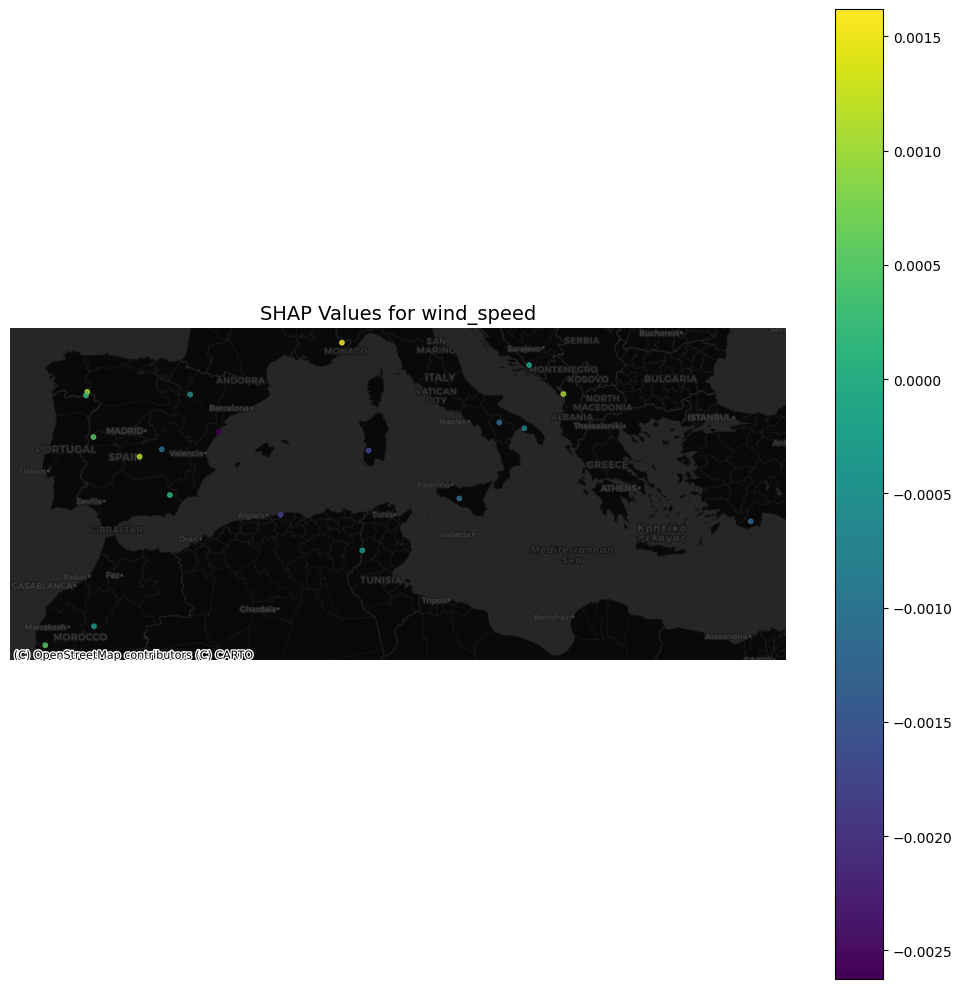

In [26]:
def plot_shap_geopandas(df, shap_column, title="SHAP Map", cmap="viridis"):
    """
    df: Pandas DataFrame mit Spalten 'lat', 'lon' und dem SHAP-Feature
    shap_column: Name der Spalte mit SHAP-Werten (z. B. 'wind_speed')
    """
    # Erstelle GeoDataFrame mit Punkten aus lat/lon
    gdf = gpd.GeoDataFrame(df,
                           geometry=gpd.points_from_xy(df['lon'], df['lat']),
                           crs="EPSG:4326")  # WGS84
    # Reprojiziere in Web-Mercator (für Hintergrundkarten wie OpenStreetMap)
    gdf = gdf.to_crs(epsg=3857)

    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(ax=ax, column=shap_column, cmap=cmap, legend=True, markersize=10, alpha=0.8)

    ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatter)

    ax.set_axis_off()
    ax.set_title(f"SHAP Values for {shap_column}", fontsize=14)
    plt.tight_layout()
    plt.show()

df = pd.read_csv("/Users/I566184/Downloads/shap_map_mlp.csv")
df.rename(columns={"x": "lat", "y": "lon"}, inplace=True)
plot_shap_geopandas(df, shap_column="wind_speed", title="SHAP für wind_speed")